# **CUHK-STAT3009**: Homework 3 - Neural Network in RS: Models, Algorithm, and virtualization (**due Dec 04**)

## **Q1: Data preprocessing**

In [ ]:
## use iris dataset in Q1
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)

### **Q1.1**
- Standardize features by removing the mean and scaling to unit variance.
- Merge `data.data` and `data.target` as a one `dataframe` with columns: [`sepal length (cm)`,	`sepal width (cm)`, `petal length (cm)`, `petal width (cm)`, `target`]
- Compute the target-specific mean of each features, that is,

              sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
      target
      0                   5.006             3.428              1.462             0.246
      1                   5.936             2.770              4.260             1.326
      2                   6.588             2.974              5.552             2.026

In [ ]:
## Your solution to Q1.1 here
from sklearn.preprocessing import StandardScaler

# Step 1: Merge data
df = data.data.copy()
df['target'] = data.target

# Step 2: Standardize features
scaler = StandardScaler()
features = data.feature_names
df[features] = scaler.fit_transform(df[features])

# Step 3: Compute target-specific mean of each feature
grouped_means = df.groupby('target').mean()
grouped_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,-1.014579,0.853263,-1.304987,-1.254893
1,0.112282,-0.661432,0.285324,0.166734
2,0.902297,-0.191831,1.019663,1.088159


### **Q1.2**

- Using `seaborn` to show the `Violinplot` of all features against `target`
- Using `seaborn` to show the `heatmap` of the correlation between all features

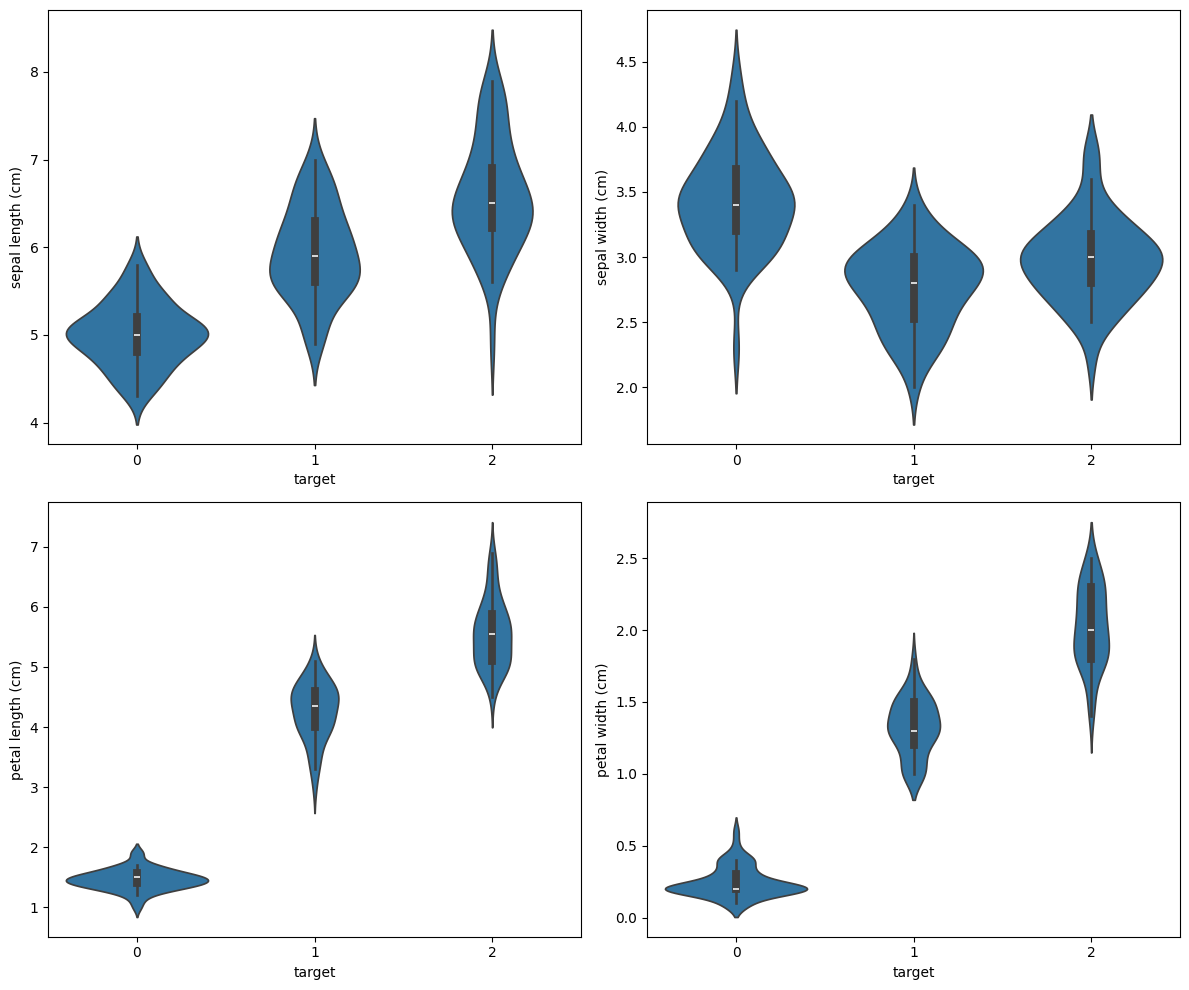

In [ ]:
## Your solution to Q1.2 here
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.violinplot(data=df, x='target', y='sepal length (cm)', ax=axes[0, 0])
sns.violinplot(data=df, x='target', y='sepal width (cm)', ax=axes[0, 1])
sns.violinplot(data=df, x='target', y='petal length (cm)', ax=axes[1, 0])
sns.violinplot(data=df, x='target', y='petal width (cm)', ax=axes[1, 1])

plt.tight_layout()
plt.show()

<Axes: >

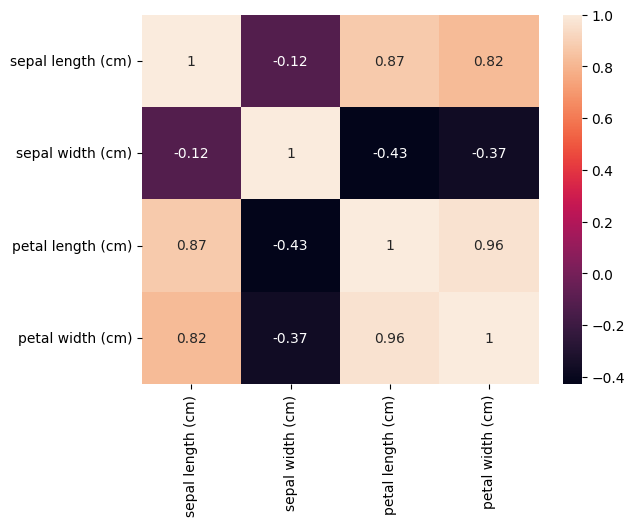

In [ ]:
## Heatmap
corr = df.drop(columns=["target"]).corr()
# Creating heatmap
sns.heatmap(corr, annot=True)

## **Q2. Semi-parametric model**

A semi-parametric model is widely used in statistical learning, machine learning, and deep learning. Given a feature-vector $\mathbf{x}$, the outcome is formulated as:
$$
f(\mathbf{x}) = \mathbf{\beta}^\intercal \mathbf{x} + h(\mathbf{x}),
$$
where $\mathbf{\beta}$ is a linear coefficient, and $h(\cdot)$ is a nonlinear function. In this question, you are expected to use $f(\mathbf{x})$ to make prediction in `California Housing dataset` based on `tensorflow`

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### **Q2.1**

- Standardize features of by removing the mean and scaling to unit variance.
- Using `tensorflow` build up a network for the model $f(\mathbf{x})$ with $h(\mathbf{x})$ as two `Dense` layers: `Dense(8, activation='relu')` + `Dense(1, activation='linear')`
- Print `model.summary()` for your model

In [ ]:
## Your solution to Q2.1 here

# Step 1: Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build model
import tensorflow as tf
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Dense(units=8, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(units=1)
])

# Step 3: Show model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

### **Q2.2**

- Compile the model with `loss`: [MAE](https://keras.io/api/losses/regression_losses/#meanabsoluteerror-class); `optimizer`: [SGD](https://keras.io/api/optimizers/sgd/); and monitoring `Metrics`: `RMSE`

- fit model
  - using `X_train`, `y_train`
  - taking 20% of data as validation set
  - [earlystopping](https://keras.io/api/callbacks/) based on `RMSE` on `validation set` with custom `patience` and other hyperparamters

- Make prediction to `X_test`, and evaluate the prediction by reporting `RMSE` and `MAE`.

In [ ]:
## Your solution to Q2.2 here
## Step 1: compile model
opt = keras.optimizers.SGD(1e-4)
model.compile(optimizer=opt,
              loss='mae',
              metrics=['root_mean_squared_error'])

In [ ]:
## Step 2: fit
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='root_mean_squared_error',
                   patience=1,
                   restore_best_weights=True)

his = model.fit(x=X_train,
                y=y_train,
                batch_size=64,
                epochs=30,
                validation_split=0.2,
                callbacks=[es])

Epoch 1/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1484 - root_mean_squared_error: 2.6081 - val_loss: 2.1558 - val_root_mean_squared_error: 2.6252
Epoch 2/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1339 - root_mean_squared_error: 2.5908 - val_loss: 2.1295 - val_root_mean_squared_error: 2.5987
Epoch 3/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.1157 - root_mean_squared_error: 2.5659 - val_loss: 2.1041 - val_root_mean_squared_error: 2.5729
Epoch 4/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0863 - root_mean_squared_error: 2.5664 - val_loss: 2.0794 - val_root_mean_squared_error: 2.5476
Epoch 5/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0405 - root_mean_squared_error: 2.4921 - val_loss: 2.0552 - val_root_mean_squared_error: 2.5229
Epoch 6/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.0145 - root_mean_squared_error: 2.4812 - val_loss: 2.0317 - val_root_mean_squared_error: 2.4987
Epoch 7/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 

In [ ]:
## Step3: prediction & evaluation
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
model.evaluate(X_test, y_test)

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.6098 - root_mean_squared_error: 2.0408


[1.6107748746871948, 2.057241678237915]

## **Q3: Implementing a Custom Recommender System using TensorFlow**

**Recommender System Model:**

The goal of this question is to implement a custom recommender system model using TensorFlow. The model is defined as follows:

$$\widehat{r}_{ui} = \mathbf{p}_u^\intercal \mathbf{q}_i + b_i + \mathbf{p}_u^\intercal \mathbf{p}_u + a_u$$

where:

* $\widehat{r}_{ui}$ is the predicted rating for user $u$ and item $i$
* $\mathbf{p}_u$ is the user latent factor vector
* $\mathbf{q}_i$ is the item latent factor vector
* $b_i$ is the item bias term
* $a_u$ is the user bias term

**Your Task:**

Implement this model using TensorFlow on our course dataset. You will need to:

1. Load the dataset and preprocess the data as needed
2. Define the model architecture using TensorFlow
3. Implement the loss function and optimizer
4. Train the model on the dataset
5. Evaluate the performance of the model using a `Acc`.

**Note:** You can use TensorFlow's built-in functions and modules to implement the model. Note that the prediction result is not of importance; this question only assesses your implementation.

In [ ]:
import numpy as np

def Acc(true_rating, pred_rating):
  return np.mean(true_rating == pred_rating)

In [ ]:
## Dowload binary dataset in CUHK-STAT3009 Github repo
import pandas as pd

train_url = "https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/b-rs/train.csv"
test_url = "https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/b-rs/test.csv"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

y_train = np.array(train['rating'].values, dtype=float)
X_train = train[['user_id', 'movie_id']].values

y_test = np.array(test['rating'].values, dtype=float)
X_test = test[['user_id', 'movie_id']].values

n_user = max( max(X_train[:,0]), max(X_test[:,0]) ) + 1
n_item = max( max(X_train[:,1]), max(X_test[:,1]) ) + 1

In [ ]:
## Your solution to Q3 here
from tensorflow import keras
from keras import layers

class RecommenderModel(keras.Model):
  def __init__(self, num_user, num_item, K=10):
    super().__init__()
    ## layers
    self.user_embed = layers.Embedding(input_dim=num_user,
                                       output_dim=K)
    self.item_embed = layers.Embedding(input_dim=num_item,
                                       output_dim=K)
    self.user_bias = layers.Embedding(input_dim=num_user,
                                       output_dim=1)
    self.item_bias = layers.Embedding(input_dim=num_item,
                                       output_dim=1)
    self.dot = layers.Dot(axes=1)
    # Specify the axis to sum over

  def call(self, inputs):
    # pu: B x r
    user_vec = self.user_embed(inputs[:,0])
    # qi: B x r
    item_vec = self.item_embed(inputs[:,1])
    # au: B x 1
    user_const = self.user_bias(inputs[:,0])
    # bi: B x 1
    item_const = self.item_bias(inputs[:,1])

    ## pu^T q_i + au + bi + pu^T pu
    dot_pq = tf.reduce_sum(user_vec * item_vec, axis=1, keepdims=True)
    dot_pp = tf.reduce_sum(user_vec * user_vec, axis=1, keepdims=True)

    out = dot_pq + dot_pp + user_const + item_const
    # out = tf.reduce_sum(user_vec*item_vec,
    #                     axis=1,
    #                     keepdims=True)
    return out

In [ ]:
model = RecommenderModel(num_user=n_user, num_item=n_item)

opt = keras.optimizers.Adam(1e-3)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['root_mean_squared_error'])

## callback
callback = [keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True,
)]

## fit with early stopping
model.fit(x=X_train,
             y=y_train,
             epochs=20,
             batch_size=512,
             validation_split=0.3,
             callbacks=callback
             )

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'recommender_model_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5393 - root_mean_squared_error: 0.7342 - val_loss: 0.4357 - val_root_mean_squared_error: 0.6601
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4031 - root_mean_squared_error: 0.6348 - val_loss: 0.3272 - val_root_mean_squared_error: 0.5720
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3002 - root_mean_squared_error: 0.5479 - val_loss: 0.2701 - val_root_mean_squared_error: 0.5197
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2457 - root_mean_squared_error: 0.4956 - val_loss: 0.2432 - val_root_mean_squared_error: 0.4931
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2160 - root_mean_squared_error: 0.4647 - val_loss: 0.2302 - val_root_mean_squared_error: 0.4798
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1992 - root_mean_squared_error: 0.4463 - val_loss: 0.2231 - val_root_mean_squared_error: 0.4723
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1882 - root_me

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()
Acc(y_test.astype(int), (y_pred >= 0.5).astype(int))

1599/1599 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


np.float64(0.6665428744551514)